<a href="https://colab.research.google.com/github/roshanbasnet/Lambton-College-AIMT/blob/main/Roshan_Basnet_AML_3204_2_S2022_Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Youtube Data Analytics

In [ ]:
# !pip install google-api-python-client

In [ ]:
from googleapiclient.discovery import build

In [ ]:
API_KEY = ""

In [ ]:
#Create a resource object
youtube = build('youtube',
                'v3',
                developerKey = API_KEY)

#Retrive youtbue videe comments
video_response = youtube.commentThreads().list(
    part='snippet,replies',
    textFormat="plainText",
    videoId="0MX_fJAhmEE"
).execute()

# video_response

In [ ]:
# for item in video_response['items']:
#   replycount = item['snippet']['totalReplyCount']
#   if replycount>0:
#     # print(replycount)
#     print(item['replies']['comments'][0]['snippet']['textDisplay'])

## Practice

In [ ]:
import cv2 as cv 
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image 


In [ ]:
def get_video_comments(v_id,API_KEY):
  count = 0

  #Create a resource object
  youtube = build('youtube',
                'v3',
                developerKey = API_KEY)

  #Retrive youtbue videe comments
  video_response = youtube.commentThreads().list(
    part='snippet,replies',
    videoId= v_id
  ).execute()

  ##Iterate over youtube video responses
  for item in video_response['items']:
    count += 1
    
    #Extract the comments
    comment = item['snippet']['topLevelComment']['snippet']['textDisplay']
    author_profile_url = item['snippet']['topLevelComment']['snippet']['authorProfileImageUrl']
    author_name = item['snippet']['topLevelComment']['snippet']['authorDisplayName']
    print("Count: ",count)
    print("Author_name:",author_name)
    image = io.imread(author_profile_url) 
    cv2_imshow(image)
    print("Comments: ",comment)
    print('\n')


In [ ]:
videoId = "Da_CDPRG2j0"
# videoId = "gCYcHz2k5x0"

# get_video_comments(videoId,API_KEY)

## Retrive comment more than 20

In [ ]:
from numpy.ma.core import count
from googleapiclient.discovery import build
from tqdm import tqdm


In [ ]:
def get_video_comments(video_id,api_key):

	# empty list for storing reply
  authorName = []
  comments = []
  Count = []
  count = 0
  replyCount = []
  likeCount  = []
  profileUrl = []
  commentId = []

	# creating youtube resource object
  youtube = build('youtube', 'v3',
					developerKey=api_key)

	# retrieve youtube video results
  video_response=youtube.commentThreads().list(
    maxResults=100,
    part='snippet,replies',
    videoId=video_id
	).execute()

	# iterate video response
  while video_response:
		
		# extracting required info
		# from each result object
    for item in tqdm(video_response['items']):
      count += 1
      # Extracting comments
      comment_id = item['snippet']['topLevelComment']['id']
      comment = item['snippet']['topLevelComment']['snippet']['textDisplay']
      author_profile_url = item['snippet']['topLevelComment']['snippet']['authorProfileImageUrl']
      author_name = item['snippet']['topLevelComment']['snippet']['authorDisplayName']
      reply_count = item['snippet']['totalReplyCount']
      like_count = item['snippet']['topLevelComment']['snippet']['likeCount']

      #append
      Count.append(count)
      commentId.append(comments)
      comments.append(comment)
      authorName.append(author_name)
      profileUrl.append(author_profile_url)
      replyCount.append(reply_count)
      likeCount.append(like_count)

    # Again repeat
    if 'nextPageToken' in video_response:
      video_response = youtube.commentThreads().list(
          part = 'snippet,replies',
          maxResults=100,
          order='time',
          videoId = video_id,
          pageToken=video_response['nextPageToken']
        ).execute()
    else:
      break
  
  
    return {
        'commentId':comment_id,
        'Count': Count,
        'Comments': comments,
        'Author Name': authorName,
        'Profile Pic':profileUrl,
        'Reply Count' : replyCount,
        'Like Count' : likeCount
    }


In [ ]:
import pandas as pd

# Enter video id
# video_id = "Da_CDPRG2j0"
video_id = "0MX_fJAhmEE"

#Enter api key
api_key = ''

# Call function
comments = get_video_comments(video_id,api_key)
df = pd.DataFrame(comments)
df.head(10)

100%|██████████| 100/100 [00:00<00:00, 234057.14it/s]


,commentId,Count,Comments,Author Name,Profile Pic,Reply Count,Like Count
0,UgzgpeETIdBiaPBE03B4AaABAg,1,For those who want the lyrics:<br><br>(Verse 1...,Amy Kuo,https://yt3.ggpht.com/ytc/AKedOLRg6oJSSwUVT53E...,43,3005
1,UgzgpeETIdBiaPBE03B4AaABAg,2,where are the fathers?,I P,https://yt3.ggpht.com/ytc/AKedOLTa1SLzXmPm7C92...,0,1
2,UgzgpeETIdBiaPBE03B4AaABAg,3,Merci pour ce bel hommage à nos Wonder&#39;Mum !,maria costa,https://yt3.ggpht.com/g-IbHdaMzz3b28hlqlC3KWsE...,0,0
3,UgzgpeETIdBiaPBE03B4AaABAg,4,I’m a 60 year man who lost is mother 33 years ...,Ant H,https://yt3.ggpht.com/ytc/AKedOLQ0NNUEwBcjNG74...,2,1
4,UgzgpeETIdBiaPBE03B4AaABAg,5,"OK, so this just crushed me",emily emily,https://yt3.ggpht.com/ytc/AKedOLT4TpuXgYGJMimp...,0,4
5,UgzgpeETIdBiaPBE03B4AaABAg,6,I watch this twice and it also makes me ugly c...,Winda Angelina Utama,https://yt3.ggpht.com/ytc/AKedOLRAqop60KwaionM...,0,15
6,UgzgpeETIdBiaPBE03B4AaABAg,7,i cried so hard .. its just me and my mama now...,congee.chowdee,https://yt3.ggpht.com/A0rrHjPtyWvR30bBKUhOJhuY...,0,9
7,UgzgpeETIdBiaPBE03B4AaABAg,8,Nangiiss bombaayy bundd,Oriana,https://yt3.ggpht.com/ytc/AKedOLRo9hRKMCkqkfeo...,0,2
8,UgzgpeETIdBiaPBE03B4AaABAg,9,Nangiiss bombayy bundd,Oriana,https://yt3.ggpht.com/ytc/AKedOLRo9hRKMCkqkfeo...,0,0
9,UgzgpeETIdBiaPBE03B4AaABAg,10,I&#39;m an orphan..........,Rajon Skywalker,https://yt3.ggpht.com/ytc/AKedOLTQ0I34x9gb9p4f...,1,6


Count:  1
Author_name: For those who want the lyrics:<br><br>(Verse 1)<br>I hold your laughter safe inside in my mind<br>Sweet moments captured so I can rewind<br>I’ll always have them so anywhere I fly<br>I know you’ll be by my side<br><br>(Verse 2)<br>You lift me up when I am feeling small<br>Up on your shoulders I become so tall<br>And though you raise me high above it all<br>I have no doubt that you’ll catch me if I fall<br><br>(Chorus 1)<br>You give me everything <br>You see the best in me<br>No matter where you go<br>You’ll come back home<br><br>(Verse 3)<br>I’m only learning to say what’s in my heart<br>So when you’re hurting I don’t know where to start<br>And though the words are often hard to find<br>We still have time to make things right<br><br>(Chorus 2)<br>You give me everything <br>You see the best in me<br>No matter where I go<br>I’ll come back home
Profile Iamge: 


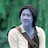

Comments:  For those who want the lyrics:<br><br>(Verse 1)<br>I hold your laughter safe inside in my mind<br>Sweet moments captured so I can rewind<br>I’ll always have them so anywhere I fly<br>I know you’ll be by my side<br><br>(Verse 2)<br>You lift me up when I am feeling small<br>Up on your shoulders I become so tall<br>And though you raise me high above it all<br>I have no doubt that you’ll catch me if I fall<br><br>(Chorus 1)<br>You give me everything <br>You see the best in me<br>No matter where you go<br>You’ll come back home<br><br>(Verse 3)<br>I’m only learning to say what’s in my heart<br>So when you’re hurting I don’t know where to start<br>And though the words are often hard to find<br>We still have time to make things right<br><br>(Chorus 2)<br>You give me everything <br>You see the best in me<br>No matter where I go<br>I’ll come back home

Count:  2
Author_name: where are the fathers?
Profile Iamge: 


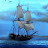

Comments:  where are the fathers?

Count:  3
Author_name: Merci pour ce bel hommage à nos Wonder&#39;Mum  !
Profile Iamge: 


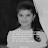

Comments:  Merci pour ce bel hommage à nos Wonder&#39;Mum  !

Count:  4
Author_name: I’m a 60 year man who lost is mother 33 years ago ❤️
Profile Iamge: 


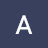

Comments:  I’m a 60 year man who lost is mother 33 years ago ❤️

Count:  5
Author_name: OK, so this just crushed me
Profile Iamge: 


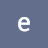

Comments:  OK, so this just crushed me

Count:  6
Author_name: I watch this twice and it also makes me ugly crying twice. My dad is still here and so is my mom but the love between mom and daughter here is so touching. I&#39;m an aspiring career woman and I&#39;m the type of person who will have so many things on my plate until my schedule is packed just like the daughter in this video. This animation is like a gentle reminder of how I should treasure every moment with my parents. They are getting older and sleeping a lot more nowadays.. it&#39;s just that.. I know they aren&#39;t gonna be here forever and I wish to cherish every moment with them and make them proud of me one day.<br><br>The part that hits me the most is that.. this animation shows how life as a cycle.. the daughter is now a mom with kid and she takes on her mom&#39;s approach in raising her daughter. The &quot;are you hungry?&quot; hits so close to home. Such a simple gesture yet it&#39;s also the most common way of s

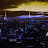

Comments:  I watch this twice and it also makes me ugly crying twice. My dad is still here and so is my mom but the love between mom and daughter here is so touching. I&#39;m an aspiring career woman and I&#39;m the type of person who will have so many things on my plate until my schedule is packed just like the daughter in this video. This animation is like a gentle reminder of how I should treasure every moment with my parents. They are getting older and sleeping a lot more nowadays.. it&#39;s just that.. I know they aren&#39;t gonna be here forever and I wish to cherish every moment with them and make them proud of me one day.<br><br>The part that hits me the most is that.. this animation shows how life as a cycle.. the daughter is now a mom with kid and she takes on her mom&#39;s approach in raising her daughter. The &quot;are you hungry?&quot; hits so close to home. Such a simple gesture yet it&#39;s also the most common way of showing affection and love, especially for asian hous

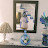

Comments:  i cried so hard .. its just me and my mama now...i make sure we have great moments coz she is old already

Count:  8
Author_name: Nangiiss bombaayy bundd
Profile Iamge: 


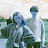

Comments:  Nangiiss bombaayy bundd

Count:  9
Author_name: Nangiiss bombayy bundd
Profile Iamge: 


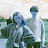

Comments:  Nangiiss bombayy bundd

Count:  10
Author_name: I&#39;m an orphan..........
Profile Iamge: 


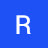

Comments:  I&#39;m an orphan..........

Count:  11
Author_name: I&#39;m crying ugly omg...
Profile Iamge: 


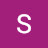

Comments:  I&#39;m crying ugly omg...

Count:  12
Author_name: Where is the father?
Profile Iamge: 


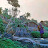

Comments:  Where is the father?

Count:  13
Author_name: ❤️❤️❤️❤️❤️
Profile Iamge: 


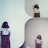

Comments:  ❤️❤️❤️❤️❤️

Count:  14
Author_name: That&#39;s a really cheap emotional video, just a lazy work to trigger easy tears. Can&#39;t see anything that warrants any &quot;award&quot;.
Profile Iamge: 


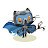

Comments:  That&#39;s a really cheap emotional video, just a lazy work to trigger easy tears. Can&#39;t see anything that warrants any &quot;award&quot;.

Count:  15
Author_name: the story is very emotional. I miss my mom, We fight, but I don&#39;t know what to do.  she both live together Still it feels like she&#39;s very far from me . Iam the most unluckiest and worst child in the world . I made my mom sad.
Profile Iamge: 


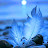

Comments:  the story is very emotional. I miss my mom, We fight, but I don&#39;t know what to do.  she both live together Still it feels like she&#39;s very far from me . Iam the most unluckiest and worst child in the world . I made my mom sad.

Count:  16
Author_name: 😭😭😭👍👍💕
Profile Iamge: 


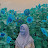

Comments:  😭😭😭👍👍💕

Count:  17
Author_name: That&#39;s not fair! I just fought with my mom. Why do I have to cry this hard?
Profile Iamge: 


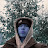

Comments:  That&#39;s not fair! I just fought with my mom. Why do I have to cry this hard?

Count:  18
Author_name: Well, THAT&#39;S a weeper.
Profile Iamge: 


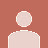

Comments:  Well, THAT&#39;S a weeper.

Count:  19
Author_name: this is nice, but, also sad, that the absent or dead father troupe is always commonplace.
Profile Iamge: 


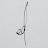

Comments:  this is nice, but, also sad, that the absent or dead father troupe is always commonplace.

Count:  20
Author_name: I won’t live after my mom dies I wont
Profile Iamge: 


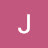

Comments:  I won’t live after my mom dies I wont

Count:  21
Author_name: Wait what? Im crying...
Profile Iamge: 


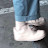

Comments:  Wait what? Im crying...

Count:  22
Author_name: 令人感动的作品，很多事情也许只有为人父母后才会明白，珍惜当下美好时光
Profile Iamge: 


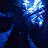

Comments:  令人感动的作品，很多事情也许只有为人父母后才会明白，珍惜当下美好时光

Count:  23
Author_name: I miss you, Mama &amp; Papa. They&#39;re in heaven now. They cook the best food in the world when they were still alive. We were struggling financially but they never let us feel hungry because they loved us more than their lives. I love you, Ma &amp; Pa. 😭❤️
Profile Iamge: 


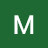

Comments:  I miss you, Mama &amp; Papa. They&#39;re in heaven now. They cook the best food in the world when they were still alive. We were struggling financially but they never let us feel hungry because they loved us more than their lives. I love you, Ma &amp; Pa. 😭❤️

Count:  24
Author_name: i cried
Profile Iamge: 


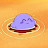

Comments:  i cried

Count:  25
Author_name: God, please let my Mommy be happy in the heaven!
Profile Iamge: 


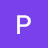

Comments:  God, please let my Mommy be happy in the heaven!

Count:  26
Author_name: Why I was hurting so deeply
Profile Iamge: 


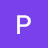

Comments:  Why I was hurting so deeply

Count:  27
Author_name: It’s just ohhh.. so personal, so emotional
Profile Iamge: 


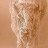

Comments:  It’s just ohhh.. so personal, so emotional

Count:  28
Author_name: What a lovely film.Thank you.
Profile Iamge: 


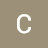

Comments:  What a lovely film.Thank you.

Count:  29
Author_name: 🥺😭🤧
Profile Iamge: 


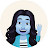

Comments:  🥺😭🤧

Count:  30
Author_name: It&#39;s so personal...
Profile Iamge: 


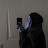

Comments:  It&#39;s so personal...

Count:  31
Author_name: Such a sweet video 🥺
Profile Iamge: 


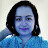

Comments:  Such a sweet video 🥺

Count:  32
Author_name: I&#39;m NOT crying! My eyeballs are sweating!
Profile Iamge: 


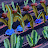

Comments:  I&#39;m NOT crying! My eyeballs are sweating!

Count:  33
Author_name: Who put onions here?
Profile Iamge: 


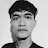

Comments:  Who put onions here?

Count:  34
Author_name: Suddenly missed my sick mom. Thanks for this beautiful and heartfelt short film.
Profile Iamge: 


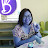

Comments:  Suddenly missed my sick mom. Thanks for this beautiful and heartfelt short film.

Count:  35
Author_name: WoW! What a beautiful short film, definitely one of my favorites. It made my cry so ugly 😭❤️ Now go and give a huge hug to your mom!
Profile Iamge: 


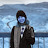

Comments:  WoW! What a beautiful short film, definitely one of my favorites. It made my cry so ugly 😭❤️ Now go and give a huge hug to your mom!

Count:  36
Author_name: This animation literally make me cry 🤗
Profile Iamge: 


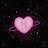

Comments:  This animation literally make me cry 🤗

Count:  37
Author_name: She can re-make what her mom used to cook, she just couldn’t speak her language anymore. How sad.
Profile Iamge: 


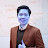

Comments:  She can re-make what her mom used to cook, she just couldn’t speak her language anymore. How sad.

Count:  38
Author_name: Very heartwarming despite being very predictable. I definitely teared up.
Profile Iamge: 


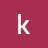

Comments:  Very heartwarming despite being very predictable. I definitely teared up.

Count:  39
Author_name: wonderful!
Profile Iamge: 


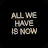

Comments:  wonderful!

Count:  40
Author_name: This is so beautiful
Profile Iamge: 


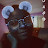

Comments:  This is so beautiful

Count:  41
Author_name: I remember the scene from liberation notes
Profile Iamge: 


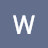

Comments:  I remember the scene from liberation notes

Count:  42
Author_name: The animation, the story, the characters BEAUTIFUL! I love it! &lt;3
Profile Iamge: 


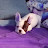

Comments:  The animation, the story, the characters BEAUTIFUL! I love it! &lt;3

Count:  43
Author_name: I respect that people are touched by this, but I could not find this more unoriginal. <br>All characters look not only the same, but also the same age. The Mother falls compeletely into the „big butt Pixar Mom“ stereotype and just like her daughter, does not age. When the daughter sat in her own childs room, I thought the scene was set just a few days after the hospital scene. I was also wondering why she would work an office job at such a young age. Not changing the characters appearance is a real issue for the storytelling. <br>And I do get that the whole point of the short film was to show how they express their love through food but it just didnt have the charm could have had.<br>Playing with food and burping, soup when sick, not eating the food when angry, and then everything all over. Theres no flavour to this film (forgive me).
Profile Iamge: 


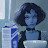

Comments:  I respect that people are touched by this, but I could not find this more unoriginal. <br>All characters look not only the same, but also the same age. The Mother falls compeletely into the „big butt Pixar Mom“ stereotype and just like her daughter, does not age. When the daughter sat in her own childs room, I thought the scene was set just a few days after the hospital scene. I was also wondering why she would work an office job at such a young age. Not changing the characters appearance is a real issue for the storytelling. <br>And I do get that the whole point of the short film was to show how they express their love through food but it just didnt have the charm could have had.<br>Playing with food and burping, soup when sick, not eating the food when angry, and then everything all over. Theres no flavour to this film (forgive me).

Count:  44
Author_name: WHERE FATHER ???
Profile Iamge: 


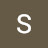

Comments:  WHERE FATHER ???

Count:  45
Author_name: And she had to end up being a single mother too... sheesh.
Profile Iamge: 


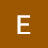

Comments:  And she had to end up being a single mother too... sheesh.

Count:  46
Author_name: Wow! watching this hurts so much. I couldn’t finish it. I miss my mommy every second of my life! When I was younger it felt as if I’d always have my mom here with me. I was proven to be wrong. 😢😢😭😭
Profile Iamge: 


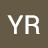

Comments:  Wow! watching this hurts so much. I couldn’t finish it. I miss my mommy every second of my life! When I was younger it felt as if I’d always have my mom here with me. I was proven to be wrong. 😢😢😭😭

Count:  47
Author_name: As we get older, lots of us can only spend time with the family only in front of the dining table that I think it is what the story wants to convey? Losing a loved one could defo break a heart and it takes years so many years to heal and it is so traumatic
Profile Iamge: 


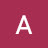

Comments:  As we get older, lots of us can only spend time with the family only in front of the dining table that I think it is what the story wants to convey? Losing a loved one could defo break a heart and it takes years so many years to heal and it is so traumatic

Count:  48
Author_name: Beaut.little family story. Simply sweet &amp; touching.
Profile Iamge: 


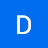

Comments:  Beaut.little family story. Simply sweet &amp; touching.

Count:  49
Author_name: my heart hurts right now, this is so touching :((
Profile Iamge: 


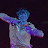

Comments:  my heart hurts right now, this is so touching :((

Count:  50
Author_name: :((
Profile Iamge: 


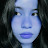

Comments:  :((

Count:  51
Author_name: How dare you, sir
Profile Iamge: 


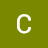

Comments:  How dare you, sir

Count:  52
Author_name: this is so sad 😭😭😭😭😭😭 hate to imagine this
Profile Iamge: 


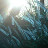

Comments:  this is so sad 😭😭😭😭😭😭 hate to imagine this

Count:  53
Author_name: Single moms are so popular nowadays?
Profile Iamge: 


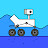

Comments:  Single moms are so popular nowadays?

Count:  54
Author_name: It makes me cry hard <br>That&#39;s my biggest fear<br>But life is life
Profile Iamge: 


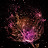

Comments:  It makes me cry hard <br>That&#39;s my biggest fear<br>But life is life

Count:  55
Author_name: ❤️
Profile Iamge: 


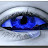

Comments:  ❤️

Count:  56
Author_name: Bonding. So important
Profile Iamge: 


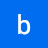

Comments:  Bonding. So important

Count:  57
Author_name: Heartwarming 👏👏👏
Profile Iamge: 


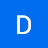

Comments:  Heartwarming 👏👏👏

Count:  58
Author_name: This makes me cry, good job guys
Profile Iamge: 


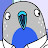

Comments:  This makes me cry, good job guys

Count:  59
Author_name: So the message is? Life revolves around food??! Or food makes everything better after you have lost a loved one?! Or be careful of food pushing on your loved ones who may become obese?!
Profile Iamge: 


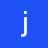

Comments:  So the message is? Life revolves around food??! Or food makes everything better after you have lost a loved one?! Or be careful of food pushing on your loved ones who may become obese?!

Count:  60
Author_name: 🥹
Profile Iamge: 


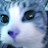

Comments:  🥹

Count:  61
Author_name: I miss u my momma 😢 💔
Profile Iamge: 


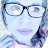

Comments:  I miss u my momma 😢 💔

Count:  62
Author_name: Mom you deserves everything. I love you.
Profile Iamge: 


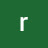

Comments:  Mom you deserves everything. I love you.

Count:  63
Author_name: Confused about them end though
Profile Iamge: 


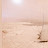

Comments:  Confused about them end though

Count:  64
Author_name: A lovely life
Profile Iamge: 


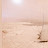

Comments:  A lovely life

Count:  65
Author_name: Cold
Profile Iamge: 


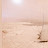

Comments:  Cold

Count:  66
Author_name: That’s beautiful! The lady speaking in mandarin
Profile Iamge: 


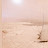

Comments:  That’s beautiful! The lady speaking in mandarin

Count:  67
Author_name: Thank you for protect Asian American rights here
Profile Iamge: 


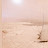

Comments:  Thank you for protect Asian American rights here

Count:  68
Author_name: absolutely amazing!!
Profile Iamge: 


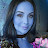

Comments:  absolutely amazing!!

Count:  69
Author_name: 😭😭😭😭😭😭😭😭😭😭
Profile Iamge: 


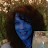

Comments:  😭😭😭😭😭😭😭😭😭😭

Count:  70
Author_name: Not all the parents may bring beautiful memories to their children, sometimes deep heart hurts last  whole life, even ruined their life
Profile Iamge: 


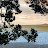

Comments:  Not all the parents may bring beautiful memories to their children, sometimes deep heart hurts last  whole life, even ruined their life

Count:  71
Author_name: I knew I was going to cry and yet I watched this anyway, why do I hate myself so much
Profile Iamge: 


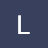

Comments:  I knew I was going to cry and yet I watched this anyway, why do I hate myself so much

Count:  72
Author_name: 🥺🥺
Profile Iamge: 


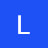

Comments:  🥺🥺

Count:  73
Author_name: Just now, my mom clicked on this not knowing what to expect and was with her, we are now both bawling on the couch. This is our family in a nutshell, and my grandma recently passed, she was the type of person to cook all the time for her children, and for anyone really, no matter how little she had she would give it. And my mom is the same. Thank you for this beautiful animation.
Profile Iamge: 


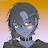

Comments:  Just now, my mom clicked on this not knowing what to expect and was with her, we are now both bawling on the couch. This is our family in a nutshell, and my grandma recently passed, she was the type of person to cook all the time for her children, and for anyone really, no matter how little she had she would give it. And my mom is the same. Thank you for this beautiful animation.

Count:  74
Author_name: sorry mama :(
Profile Iamge: 


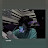

Comments:  sorry mama :(

Count:  75
Author_name: I cried 😭😭😭 love you mom
Profile Iamge: 


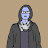

Comments:  I cried 😭😭😭 love you mom

Count:  76
Author_name: One of the most beautiful short films I&#39;ve ever seen, a short film with a fairly consistent message and a lot of learning that we often don&#39;t realize on a daily basis.❤️🫂
Profile Iamge: 


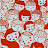

Comments:  One of the most beautiful short films I&#39;ve ever seen, a short film with a fairly consistent message and a lot of learning that we often don&#39;t realize on a daily basis.❤️🫂

Count:  77
Author_name: I work in different city with my mom. Everytime i visit her, i always get dinner at home no matter what bcs i miss her cook. Remember, mom always be happy if we eat it
Profile Iamge: 


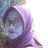

Comments:  I work in different city with my mom. Everytime i visit her, i always get dinner at home no matter what bcs i miss her cook. Remember, mom always be happy if we eat it

Count:  78
Author_name: Cry .. 💔💔💔
Profile Iamge: 


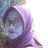

Comments:  Cry .. 💔💔💔

Count:  79
Author_name: I cried 😢
Profile Iamge: 


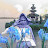

Comments:  I cried 😢

Count:  80
Author_name: 1 minute into the video and I’m already choked up. I miss my mom
Profile Iamge: 


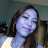

Comments:  1 minute into the video and I’m already choked up. I miss my mom

Count:  81
Author_name: 啊啊啊，好伤心。。。我和我的父母的关系不是很亲密，他们带来我很多的难过。。。到现在还在影响我，你应该会问“ 为什么？“。 从我小时候的时候，他们会打我，骂我，跟我说是”爱“。有一次我十一岁的时候，我发脾气因为我的爸爸不让我玩游戏。他们很大力的打我，然后打到我的眼睛白色的地方流血。带我去医生了，医生说里面没事的。好啦，我不在写了。等一下我哭不停了哈哈。拜拜哦
Profile Iamge: 


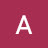

Comments:  啊啊啊，好伤心。。。我和我的父母的关系不是很亲密，他们带来我很多的难过。。。到现在还在影响我，你应该会问“ 为什么？“。 从我小时候的时候，他们会打我，骂我，跟我说是”爱“。有一次我十一岁的时候，我发脾气因为我的爸爸不让我玩游戏。他们很大力的打我，然后打到我的眼睛白色的地方流血。带我去医生了，医生说里面没事的。好啦，我不在写了。等一下我哭不停了哈哈。拜拜哦

Count:  82
Author_name: :&#39;)
Profile Iamge: 


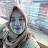

Comments:  :&#39;)

Count:  83
Author_name: Marvelous short animation !
Profile Iamge: 


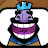

Comments:  Marvelous short animation !

Count:  84
Author_name: ❤❤
Profile Iamge: 


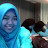

Comments:  ❤❤

Count:  85
Author_name: Thank you!<br>Very good 😢😢😢👍👍👍👏👏👏
Profile Iamge: 


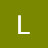

Comments:  Thank you!<br>Very good 😢😢😢👍👍👍👏👏👏

Count:  86
Author_name: Where is the father?
Profile Iamge: 


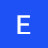

Comments:  Where is the father?

Count:  87
Author_name: it was so much emotional D&#39;:
Profile Iamge: 


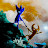

Comments:  it was so much emotional D&#39;:

Count:  88
Author_name: Excellent video that touch human hearts
Profile Iamge: 


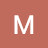

Comments:  Excellent video that touch human hearts

Count:  89
Author_name: This was so good
Profile Iamge: 


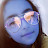

Comments:  This was so good

Count:  90
Author_name: I really really luv this type of animations. (Not sure what it&#39;s called.) <br>I luv the details! Like, all the chinese dishes; they&#39;re so detailed!
Profile Iamge: 


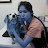

Comments:  I really really luv this type of animations. (Not sure what it&#39;s called.) <br>I luv the details! Like, all the chinese dishes; they&#39;re so detailed!

Count:  91
Author_name: I really really luv this type of animations. (Not sure what it&#39;s called.) <br>I luv the details! Like, all the chinese dishes; they&#39;re so detailed!
Profile Iamge: 


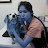

Comments:  I really really luv this type of animations. (Not sure what it&#39;s called.) <br>I luv the details! Like, all the chinese dishes; they&#39;re so detailed!

Count:  92
Author_name: I cried
Profile Iamge: 


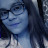

Comments:  I cried

Count:  93
Author_name: really, I don’t think Chinese eat rice with jiaozi.
Profile Iamge: 


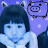

Comments:  really, I don’t think Chinese eat rice with jiaozi.

Count:  94
Author_name: foods connected us 😭
Profile Iamge: 


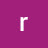

Comments:  foods connected us 😭

Count:  95
Author_name: <a href="https://youtube.com/shorts/c_pXTwJhPt8?feature=share">https://youtube.com/shorts/c_pXTwJhPt8?feature=share</a>
Profile Iamge: 


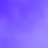

Comments:  <a href="https://youtube.com/shorts/c_pXTwJhPt8?feature=share">https://youtube.com/shorts/c_pXTwJhPt8?feature=share</a>

Count:  96
Author_name: Uncle Roger would be happy; She used an gas stove than a induction stove.
Profile Iamge: 


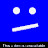

Comments:  Uncle Roger would be happy; She used an gas stove than a induction stove.

Count:  97
Author_name: This brought me tears to my eyes
Profile Iamge: 


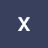

Comments:  This brought me tears to my eyes

Count:  98
Author_name: I just cried
Profile Iamge: 


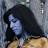

Comments:  I just cried

Count:  99
Author_name: Great animated short story and a sad one as well. Like the saying goes, &#39;You never know what you have until it&#39;s gone.&#39; That includes family, because they are the most important person in your life.
Profile Iamge: 


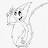

Comments:  Great animated short story and a sad one as well. Like the saying goes, &#39;You never know what you have until it&#39;s gone.&#39; That includes family, because they are the most important person in your life.

Count:  100
Author_name: For the ones that weren’t blessed with kind parents: remember it is alright to not love your parents! It is alright to feel anger towards them but don’t burden yourself with hatred, don’t let them destroy your life! And most important: It is NOT YOUR FAULT! Stay safe!
Profile Iamge: 


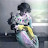

Comments:  For the ones that weren’t blessed with kind parents: remember it is alright to not love your parents! It is alright to feel anger towards them but don’t burden yourself with hatred, don’t let them destroy your life! And most important: It is NOT YOUR FAULT! Stay safe!



In [ ]:
for item in df.values:
  # print
  print("Count: ",item[1])
  print("Author_name:",item[2])
  image = io.imread(item[4]) 
  print("Profile Iamge: ")
  cv2_imshow(image)
  print("Comments: ",item[2])
  print("================================\n")